In [1]:
import pandas as pd
import numpy as np
import os
import sklearn.preprocessing

In [2]:
path = r'/Users/sujiaqi/Desktop/last semester courses/jgl/project/ticks_201910'
list_VXX = []
list_SPY = []
for (root, dirs, files) in os.walk(path):
    for file in files:
        Dr_type = file.split("_")[1]
        #print(Dr_type)
        if Dr_type == 'VXX':
            list_VXX.append(file)
        elif Dr_type == 'SPY':
            list_SPY.append(file)
#data = pd.read_csv(path + 'tick_VXX_20191010.txt', header = None)

In [3]:
list_SPY.sort()
list_VXX.sort()

In [4]:
prices_VXX = []
times_VXX = []
for vxx in list_VXX:
    data = pd.read_csv(path + os.sep + vxx, header = None)
    price = data.iloc[:, 5]
    dates = data.iloc[:, 0]
    for i in range(0, len(price)):
        prices_VXX.append(price[i])
        #times_VXX.append(dates[i].split(" ")[1].split(".")[0])
        times_VXX.append(dates[i].split(".")[0])
        
prices_SPY = []
times_SPY = []
for spy in list_SPY:
    data = pd.read_csv(path + os.sep + spy, header = None)
    price = data.iloc[:, 5]
    dates = data.iloc[:, 0]
    for i in range(0, len(price)):
        prices_SPY.append(price[i])
        times_SPY.append(dates[i].split(".")[0])

In [5]:
prices_SPY_scaler = sklearn.preprocessing.scale(prices_SPY)
prices_VXX_scaler = sklearn.preprocessing.scale(prices_VXX)

In [6]:
df_VXX = pd.DataFrame(list(zip(pd.to_datetime(times_VXX), prices_VXX_scaler)), 
               columns =['Date', 'Price(scaled)'])

df_SPY = pd.DataFrame(list(zip(pd.to_datetime(times_SPY), prices_SPY_scaler)), 
               columns =['Date', 'Price(scaled)'])

In [7]:
#df_VXX = df_VXX.set_index('Date')
#df_SPY = df_SPY.set_index('Date')
df_VXX.head(3)

,Date,Price(scaled)
0,2019-10-01 13:30:00,0.266302
1,2019-10-01 13:30:00,0.266302
2,2019-10-01 13:30:00,0.266302


In [8]:
import matplotlib.pyplot as plt
#plt.plot(df_SPY['Price'][100:1000], df_SPY['Date'][100:1000], color='blue')
#plt.plot(df_VXX['Price'][:300], color='red')
#df_SPY['Price'][100:1000].plot(color='blue')
#df_VXX['Price'][:300].plot(color='red')

In [9]:
changes_SPY = []
for i in range(0, len(prices_SPY)-1):
    change = abs((prices_SPY[i+1] - prices_SPY[i])/prices_SPY[i])
    changes_SPY.append(change)
    
changes_VXX = []
for i in range(0, len(prices_VXX)-1):
    change = abs((prices_VXX[i+1] - prices_VXX[i])/prices_VXX[i])
    changes_VXX.append(change)

In [10]:
L_VXX = []
for i in range(0, len(changes_VXX)):
    if changes_VXX[i] > 0.01:
        L_VXX.append(i)
        
'''L_SPY = []
for i in range(0, len(changes_SPY)):
    if changes_SPY[i] > 0.001:
        L_SPY.append(i)
'''
len(L_VXX)

11

In [11]:
T_VXX = []
#T_SPY = []
for i in range(0, len(L_VXX)):
    T_VXX.append(times_VXX[L_VXX[i]])
#for i in range(0, len(L_SPY)):
#    T_SPY.append(times_SPY[L_SPY[i]])

In [12]:
T_VXX

['2019-10-01 20:13:37',
 '2019-10-04 20:19:39',
 '2019-10-07 14:58:16',
 '2019-10-08 20:54:48',
 '2019-10-10 20:40:42',
 '2019-10-14 20:18:50',
 '2019-10-16 19:59:58',
 '2019-10-23 19:59:44',
 '2019-10-25 20:14:45',
 '2019-10-30 19:59:56',
 '2019-10-31 19:59:49']

In [13]:
#2019-10-01 20:13:37
#2019-10-16 19:59:58
#2019-10-23 19:59:44
#2019-10-30 19:59:56

index_10_1 = 0
for i in range(len(times_SPY)-1, -1, -1):
    if times_SPY[i] == '2019-10-01 20:13:37':
        index_10_1 = i
print(index_10_1)

index_10_16 = 0
for i in range(len(times_SPY)-1, -1, -1):
    if times_SPY[i] == '2019-10-16 19:59:58':
        index_10_16 = i
print(index_10_16)

index_10_23 = 0
for i in range(len(times_SPY)-1, -1, -1):
    if times_SPY[i] == '2019-10-23 19:59:44':
        index_10_23 = i
print(index_10_23)

index_10_30 = 0
for i in range(len(times_SPY)-1, -1, -1):
    if times_SPY[i] == '2019-10-30 19:59:56':
        index_10_30 = i
print(index_10_30)

10760
90238
118270
148296


In [14]:
print(L_VXX[0])
print(L_VXX[6])
print(L_VXX[7])
print(L_VXX[9])

2711
21475
27713
34976


In [15]:
df_VXX = df_VXX.set_index('Date')
df_SPY = df_SPY.set_index('Date')

In [19]:
I_SPY = [index_10_1, index_10_16, index_10_23, index_10_30]
I_VXX = [L_VXX[0], L_VXX[6], L_VXX[7], L_VXX[9]]

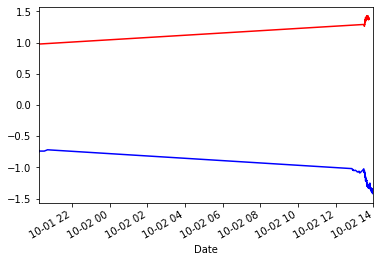

In [20]:
df_SPY['Price(scaled)'][I_SPY[0]:I_SPY[0]+1000].plot(color='blue')
df_VXX['Price(scaled)'][I_VXX[0]:I_VXX[0]+300].plot(color='red')

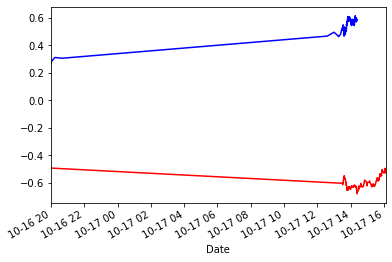

In [21]:
df_SPY['Price(scaled)'][I_SPY[1]:I_SPY[1]+1000].plot(color='blue')
df_VXX['Price(scaled)'][I_VXX[1]:I_VXX[1]+300].plot(color='red')

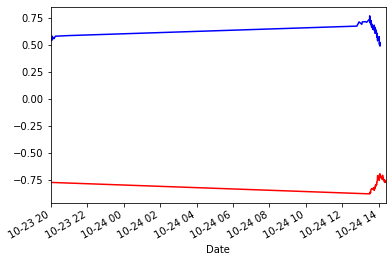

In [22]:
df_SPY['Price(scaled)'][I_SPY[2]:I_SPY[2]+1000].plot(color='blue')
df_VXX['Price(scaled)'][I_VXX[2]:I_VXX[2]+300].plot(color='red')

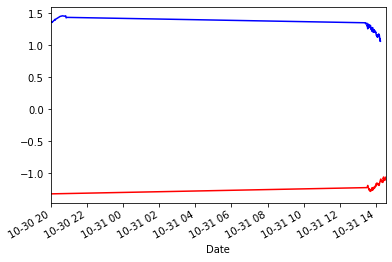

In [23]:
df_SPY['Price(scaled)'][I_SPY[3]:I_SPY[3]+1000].plot(color='blue')
df_VXX['Price(scaled)'][I_VXX[3]:I_VXX[3]+300].plot(color='red')